In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_max

array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])

In [3]:
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
temp_min

array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [4]:
month = np.arange(12)
month

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [5]:
# Fitting the periodic function
from scipy import optimize
def yearly_temps(times, avg, ampl,time_offset):
    aa =  avg+ ampl * np.cos((times + time_offset) * 2 * np.pi / times.max())
    return aa
res_max, cov_max = optimize.curve_fit(yearly_temps, month,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, month,
                                      temp_min, [-40, 20, 0])

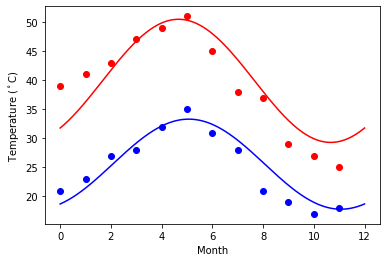

In [6]:
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(month, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(month, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()

In [7]:
# visulalization data
import pandas as pd

In [58]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)
titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Text(0.5, 1.0, 'Fare paid and the Age')

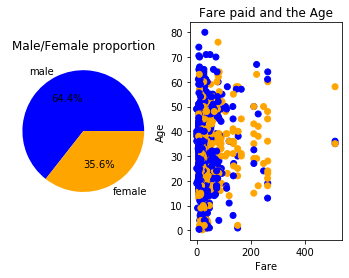

In [65]:
count=titanic['sex'].value_counts()
colors = ['blue', 'orange']
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(count.values.tolist(), labels=count.index.values.tolist(), colors=colors,autopct='%.1f%%')
ax1.set_title('Male/Female proportion')

'''2. Create a scatterplot with the Fare paid and the Age, 
differ the plot color by gender'''

#print(titanic['sex'].count)
#print(titanic['sex'].iloc[:-1])

colors = {'male':'blue', 'female':'orange'}
ax2.scatter(titanic.fare.iloc[:-1],titanic.age.iloc[:-1],c=titanic['sex'].iloc[:-1].apply(lambda x:colors[x]))
ax2.set_xlabel('Fare')
ax2.set_ylabel('Age')
ax2.set_title('Fare paid and the Age')